<a href="https://colab.research.google.com/github/xantabdoc/H8_PYTNONL_062/blob/main/assignment/PYTN_ASSGN_2_062_RUBEN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Projects 2 // Statistical Treatment for Datasets</font></h1>

Title: Hacktiv8 PTP Introduction to Data Science Projects 2: Statistical Treatment for Datasets Starter Notebook\
Last Updated: September 20, 2020\
Author: Raka Ardhi

## NYC Property Sales Introduction

The aim of this projects is to introduce you to practical statistic with Python as concrete and as consistent as possible. Using what you’ve learned; download the NYC Property Sales Dataset from Kaggle. This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

* `BOROUGH`: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
* `BLOCK`; `LOT`: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
* `BUILDING CLASS AT PRESENT` and `BUILDING CLASS AT TIME OF SALE`: The type of building at various points in time.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

* Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
* This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

Formulate a question and derive a statistical hypothesis test to answer the question. You have to demonstrate that you’re able to make decisions using data in a scientific manner. Examples of questions can be:

* Is there a difference in unit sold between property built in 1900-2000 and 2001 so on?
* Is there a difference in unit sold based on building category?
* What can you discover about New York City real estate by looking at a year's worth of raw transaction records? Can you spot trends in the market?

Please make sure that you have completed the lesson for this course, namely Python and Practical Statistics which is part of this Program.

**Note:** You can take a look at Project Rubric below:

| Code Review |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
| Mean | Student implement mean to specifics column/data using pandas, numpy, or scipy|
| Median | Student implement median to specifics column/data using pandas, numpy, or scipy|
| Modus | Student implement modus to specifics column/data using pandas, numpy, or scipy|
| Central Tendencies | Implementing Central Tendencies through dataset |
| Box Plot | Implementing Box Plot to visualize spesific data |
| Z-Score | Implementing Z-score concept to specific data |
| Probability Distribution | Student analyzing distribution of data and gain insight from the distribution |
| Intervals | Implementing Confidence or Prediction Intervals |
| Hypotesis Testing | Made 1 Hypotesis and get conclusion from data |
| Preprocessing | Student preprocess dataset before applying the statistical treatment. |
| Does the code run without errors? | The code runs without errors. All code is functional and formatted properly. |

| Readability |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
| Well Documented | All cell in notebook are well documented with markdown above each cell explaining the code|

| Analysis |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
|Overall Analysis| Gain an insight/conclusion of overall plots that answer the hypotesis |

**Focus on "Graded-Function" sections.**

------------

## Data Preparation

Load the library you need.

Get your NYC property data from [here](https://www.kaggle.com/new-york-city/nyc-property-sales) and load the dataframe to your notebook.

In [ ]:
# Get your import statement here
import math
import statistics
import scipy.stats as st
import numpy as np
import pandas as pd
import random
import warnings
import statsmodels.api as sm
import scipy.stats.distributions as dist
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
import seaborn as sns
from google.colab import drive


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Add SNS Config
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(5,5)})

In [ ]:
# Load Dataset

print ('Data read into a pandas dataframe!')
drive.mount('/content/drive')
rawData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/nyc-rolling-sales.csv")
rawData = rawData.loc[:, ~rawData.columns.str.contains('^Unnamed')]
print ('Data has been read from google drive')

Data read into a pandas dataframe!
Mounted at /content/drive
Data has been read from google drive


Let's view the top 5 rows of the dataset using the `head()` function.

In [ ]:
# Write your syntax here
print('find first 5 data row')
print(rawData.head())

find first 5 data row
   BOROUGH   NEIGHBORHOOD  ... SALE PRICE            SALE DATE
0        1  ALPHABET CITY  ...    6625000  2017-07-19 00:00:00
1        1  ALPHABET CITY  ...        -    2016-12-14 00:00:00
2        1  ALPHABET CITY  ...        -    2016-12-09 00:00:00
3        1  ALPHABET CITY  ...    3936272  2016-09-23 00:00:00
4        1  ALPHABET CITY  ...    8000000  2016-11-17 00:00:00

[5 rows x 21 columns]


We can also veiw the bottom 5 rows of the dataset using the `tail()` function.

In [ ]:
# Write your syntax here
print('find last 5 data row')
print(rawData.tail())


find last 5 data row
       BOROUGH NEIGHBORHOOD  ... SALE PRICE            SALE DATE
84543        5      WOODROW  ...     450000  2016-11-28 00:00:00
84544        5      WOODROW  ...     550000  2017-04-21 00:00:00
84545        5      WOODROW  ...     460000  2017-07-05 00:00:00
84546        5      WOODROW  ...   11693337  2016-12-21 00:00:00
84547        5      WOODROW  ...      69300  2016-10-27 00:00:00

[5 rows x 21 columns]


BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).

To view the dimensions of the dataframe, we use the `.shape` parameter. Expected result: (84548, 22)

In [ ]:
# Write your syntax here
print(rawData.shape)

(84548, 21)


According to this official page, Ease-ment is "is a right, such as a right of way, which allows an entity to make limited use of another’s real property. For example: MTA railroad tracks that run across a portion of another property". Also, the Unnamed column is not mentioned and was likely used for iterating through records. So, those two columns are removed for now.

In [ ]:
# Drop 'Unnamed: 0' and 'EASE-MENT' features using .drop function
rawDataModify = rawData
print('dataframe information before cleaning')
rawDataModify.info()
# Unnamed 0 will not read by Dataframe
rawDataModify = rawDataModify.drop(['EASE-MENT'],axis=1)

dataframe information before cleaning
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   EASE-MENT                       84548 non-null  object
 7   BUILDING CLASS AT PRESENT       84548 non-null  object
 8   ADDRESS                         84548 non-null  object
 9   APARTMENT NUMBER                84548 non-null  object
 10  ZIP CODE                        84548 non-null  int64 
 11  RESIDENTIAL UNITS               84548 non-null  int64 
 12  COMMERCI

Let's view Dtype of each features in dataframe using `.info()` function.

In [ ]:
rawDataModify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT       84548 non-null  object
 7   ADDRESS                         84548 non-null  object
 8   APARTMENT NUMBER                84548 non-null  object
 9   ZIP CODE                        84548 non-null  int64 
 10  RESIDENTIAL UNITS               84548 non-null  int64 
 11  COMMERCIAL UNITS                84548 non-null  int64 
 12  TOTAL UNITS                     84548 non-null

It looks like empty records are not being treated as NA. We convert columns to their appropriate data types to obtain NAs.

In [ ]:
#First, let's check which columns should be categorical
print('Column name')
for col in rawDataModify.columns:
    if rawDataModify[col].dtype=='object':
        print(col, rawDataModify[col].nunique())

Column name
NEIGHBORHOOD 254
BUILDING CLASS CATEGORY 47
TAX CLASS AT PRESENT 11
BUILDING CLASS AT PRESENT 167
ADDRESS 67563
APARTMENT NUMBER 3989
LAND SQUARE FEET 6062
GROSS SQUARE FEET 5691
BUILDING CLASS AT TIME OF SALE 166
SALE PRICE 10008
SALE DATE 364


In [ ]:
# LAND SQUARE FEET,GROSS SQUARE FEET, SALE PRICE, BOROUGH should be numeric. 
# SALE DATE datetime format.
# categorical: NEIGHBORHOOD, BUILDING CLASS CATEGORY, TAX CLASS AT PRESENT, BUILDING CLASS AT PRESENT,
# BUILDING CLASS AT TIME OF SALE, TAX CLASS AT TIME OF SALE,BOROUGH 

numer = ['LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE', 'BOROUGH']
for col in numer: # coerce for missing values
    rawDataModify[col] = pd.to_numeric(rawDataModify[col], errors='coerce')

categ = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categ:
    rawDataModify[col] = rawDataModify[col].astype('category')

rawDataModify['SALE DATE'] = pd.to_datetime(rawDataModify['SALE DATE'], errors='coerce')

Our dataset is ready for checking missing values.

In [ ]:
missing = rawDataModify.isnull().sum()/len(rawDataModify)*100

print(pd.DataFrame([missing[missing>0],pd.Series(rawDataModify.isnull().sum()[rawDataModify.isnull().sum()>1000])], index=['percent missing','how many missing']))

                  LAND SQUARE FEET  GROSS SQUARE FEET   SALE PRICE
percent missing          31.049818          32.658372     17.22217
how many missing      26252.000000       27612.000000  14561.00000


Around 30% of GROSS SF and LAND SF are missing. Furthermore, around 17% of SALE PRICE is also missing.

Filling and finding missing value from one column to another ti reduce missing values.

In [ ]:
print(rawDataModify[(rawDataModify['LAND SQUARE FEET'].isnull()) & (rawDataModify['GROSS SQUARE FEET'].notnull())].shape)
print(rawDataModify[(rawDataModify['LAND SQUARE FEET'].notnull()) & (rawDataModify['GROSS SQUARE FEET'].isnull())].shape)

(6, 20)
(1366, 20)


There are 1372 rows that can be filled in with their approximate values.

In [ ]:
rawDataModify['LAND SQUARE FEET'] = rawDataModify['LAND SQUARE FEET'].mask((rawDataModify['LAND SQUARE FEET'].isnull()) & (rawDataModify['GROSS SQUARE FEET'].notnull()), rawDataModify['GROSS SQUARE FEET'])
rawDataModify['GROSS SQUARE FEET'] = rawDataModify['GROSS SQUARE FEET'].mask((rawDataModify['LAND SQUARE FEET'].notnull()) & (rawDataModify['GROSS SQUARE FEET'].isnull()), rawDataModify['LAND SQUARE FEET'])

In [ ]:
#  Check for duplicates before

print(sum(rawDataModify.duplicated()))

rawDataModify[rawDataModify.duplicated(keep=False)].sort_values(['NEIGHBORHOOD', 'ADDRESS']).head(10)

# df.duplicated() automatically excludes duplicates, to keep duplicates in df we use keep=False

# in df.duplicated(df.columns) we can specify column names to look for duplicates only in those mentioned columns.

765


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
76286,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76287,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76322,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11
76323,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11
76383,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06
76384,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06
76643,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21
76644,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21
50126,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105,3,0,3,2000.0,1400.0,1930,1,C0,NaN,2017-01-12
50127,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105,3,0,3,2000.0,1400.0,1930,1,C0,NaN,2017-01-12


The dataframe has 765 duplicated rows (exluding the original rows).

In [ ]:
rawDataModify.drop_duplicates(inplace=True)

print(sum(rawDataModify.duplicated()))

0


## Exploratory data analysis

Now, let's get a simple descriptive statistics with `.describe()` function for `COMMERCIAL UNITS` features.

In [ ]:
rawDataModify[rawDataModify['COMMERCIAL UNITS']==0].describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,78777.000000,78777.000000,78777.000000,78777.000000,78777.000000,78777.0,78777.000000,5.278000e+04,5.278000e+04,78777.000000,6.562900e+04
mean,3.004329,4273.781015,395.422420,10722.737068,1.691737,0.0,1.724133,3.140140e+03,2.714612e+03,1781.065451,9.952969e+05
std,1.298594,3589.241940,671.604654,1318.493961,9.838994,0.0,9.835016,2.929999e+04,2.791294e+04,551.024570,3.329268e+06
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,2.000000,1330.000000,23.000000,10304.000000,0.000000,0.0,1.000000,1.600000e+03,9.750000e+02,1920.000000,2.400000e+05
50%,3.000000,3340.000000,52.000000,11209.000000,1.000000,0.0,1.000000,2.295000e+03,1.600000e+03,1940.000000,5.294900e+05
75%,4.000000,6361.000000,1003.000000,11357.000000,2.000000,0.0,2.000000,3.300000e+03,2.388000e+03,1967.000000,9.219560e+05
max,5.000000,16322.000000,9106.000000,11694.000000,889.000000,0.0,889.000000,4.252327e+06,4.252327e+06,2017.000000,3.450000e+08


Let us try to understand the columns. Above table shows descriptive statistics for the numeric columns.

- There are zipcodes with 0 value
- Can block/lot numbers go up to 16322?
- Most of the properties have 2 unit and maximum of 1844 units? The latter might mean some company purchased a building. This should be treated as an outlier.
- Other columns also have outliers which needs further investigation.
- Year column has a year with 0
- Most sales prices less than 10000 can be treated as gift or transfer fees.

Now, let's get a simple descriptive statistics with `.describe()` function for `RESIDENTIAL UNITS` features.

Function below are graded function. (1 Points)

In [ ]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)
rawDataModify['RESIDENTIAL UNITS'].describe()

# Graded-Funtion End

count    83783.000000
mean         1.999976
std         16.569118
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max       1844.000000
Name: RESIDENTIAL UNITS, dtype: float64

Write your findings below:

Rata-Rata unit yang tersisa pada residential adalah 2, Dan sudah banyak residential yang tidak mempunyai unit untuk di jual

Use `.value_counts` function to count total value of `BOROUGH` features. Expected value:

4    26548\
3    23843\
1    18102\
5     8296\
2     6994\
Name: BOROUGH, dtype: int64

In [ ]:
# Write your syntax below
rawDataModify.value_counts(['BOROUGH'])


BOROUGH
4          26548
3          23843
1          18102
5           8296
2           6994
dtype: int64

From here, we can calculate the mean for each Borough. Use `.mean()` function to calculate mean.

Function below are graded function. (1 Points)

In [ ]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)
#rawDataModify['BOROUGH'].mean()
rawDataModify.groupby(['BOROUGH'])['SALE PRICE'].mean()
# Graded-Funtion End

BOROUGH
1    3.344642e+06
2    5.946771e+05
3    8.410834e+05
4    7.388827e+05
5    5.436113e+05
Name: SALE PRICE, dtype: float64

From here, we can calculate the median for each Borough. Use `.median()` function to calculate median.

Function below are graded function. (1 Points)

In [ ]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)
rawDataModify.groupby(['BOROUGH'])['SALE PRICE'].median()
# Graded-Funtion End

BOROUGH
1    1155000.0
2     274897.0
3     425605.0
4     495000.0
5     465000.0
Name: SALE PRICE, dtype: float64

From here, we can calculate the mode for each Borough.

Function below are graded function. (1 Points)

In [ ]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)
rawDataModify.groupby(['BOROUGH']).apply(pd.DataFrame.mode)['SALE PRICE'].reset_index()
#print(x)
#print(x['SALE PRICE'])
# Graded-Funtion End

,BOROUGH,level_1,SALE PRICE
0,1,0,10.0
1,2,0,0.0
2,3,0,0.0
3,4,0,10.0
4,5,0,10.0


From here, we can calculate the Range for each Borough.

Function below are graded function. (1 Points)

In [ ]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)
rawDataModify.groupby(['BOROUGH'],as_index=False).agg({'SALE PRICE': ['min','mean', 'max']}).reset_index()
# Graded-Funtion End

index BOROUGH SALE PRICE                            
                       min          mean           max
0     0       1        1.0  3.344642e+06  2.210000e+09
1     1       2        0.0  5.946771e+05  1.100000e+08
2     2       3        0.0  8.410834e+05  3.450000e+08
3     3       4        1.0  7.388827e+05  2.575000e+08
4     4       5        1.0  5.436113e+05  1.220000e+08

From here, we can calculate the Variance for each Borough.

Function below are graded function. (1 Points)

In [ ]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)
rawDataModify.groupby(['BOROUGH'],as_index=False).agg({'SALE PRICE': ['var']}).reset_index()
# Graded-Funtion End

,index,BOROUGH,SALE PRICE
,,,var
0,0,1,5.827628e+14
1,1,2,7.803693e+12
2,2,3,1.561761e+13
3,3,4,1.041624e+13
4,4,5,3.631100e+12


From here, we can calculate the SD for each Borough.

Function below are graded function. (1 Points)

In [ ]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)
rawDataModify.groupby(['BOROUGH'],as_index=False).agg({'SALE PRICE': ['std']}).reset_index()
# Graded-Funtion End

,index,BOROUGH,SALE PRICE
,,,std
0,0,1,2.414048e+07
1,1,2,2.793509e+06
2,2,3,3.951912e+06
3,3,4,3.227420e+06
4,4,5,1.905544e+06


Now we can analyze Probability Distibution below.

Function below are graded function. (1 Points)

       BOROUGH   NEIGHBORHOOD  ...  YEAR MONTH
0            1  ALPHABET CITY  ...  2017     7
3            1  ALPHABET CITY  ...  2016     9
4            1  ALPHABET CITY  ...  2016    11
6            1  ALPHABET CITY  ...  2016     9
9            1  ALPHABET CITY  ...  2016    11
...        ...            ...  ...   ...   ...
84543        5        WOODROW  ...  2016    11
84544        5        WOODROW  ...  2017     4
84545        5        WOODROW  ...  2017     7
84546        5        WOODROW  ...  2016    12
84547        5        WOODROW  ...  2016    10

[69987 rows x 23 columns]


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.02, 'distribution of commercial unit sale price')

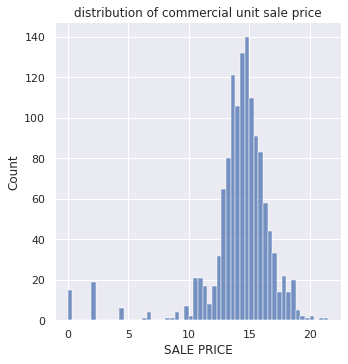

In [ ]:
# Write your function below

# Graded-Funtion Begin
rawData.drop(rawData[rawData['SALE PRICE'] == ' -  '].index,inplace=True)

df_year = rawData[(rawData['RESIDENTIAL UNITS']==0)&(rawData["COMMERCIAL UNITS"]>0)]
rawData['SALE DATE'] = pd.to_datetime(rawData['SALE DATE']).dt.normalize()
rawData['YEAR'] = rawData['SALE DATE'].dt.year
rawData['MONTH'] = rawData['SALE DATE'].dt.month
rawData['SALE PRICE'] = pd.to_numeric(rawData['SALE PRICE'])
print(rawData)
df_sale= df_year.loc[:,('NEIGHBORHOOD','BUILDING CLASS CATEGORY','BUILDING CLASS AT TIME OF SALE','SALE PRICE','YEAR','MONTH')]
sales = np.log(df_sale['SALE PRICE'])
sns.displot(sales)
plt.title("distribution of commercial unit sale price",y=1.02)




# Graded-Funtion End

Now we can analyze Confidence Intervals below.

Function below are graded function. (1 Points)

In [ ]:
# Write your function below

# Graded-Funtion Begin
rawDataModify2 = rawDataModify.groupby(['BOROUGH']).agg({'SALE PRICE':['mean','count','std']})
print(rawDataModify2)
print('-'*30)
ci95_hi = []
ci95_lo = []

for i in rawDataModify2.index:
  m,c,s = rawDataModify2.loc[i]
  ci95_hi.append(m + 1.96*s/math.sqrt(c))
  ci95_lo.append(m - 1.96*s/math.sqrt(c))
rawDataModify2['ci95_hi'] = ci95_hi
rawDataModify2['ci95_lo'] = ci95_lo
print('-'*30)
print(rawDataModify2)


# Graded-Funtion End

           SALE PRICE                     
                 mean  count           std
BOROUGH                                   
1        3.344642e+06  14374  2.414048e+07
2        5.946771e+05   6994  2.793509e+06
3        8.410834e+05  23843  3.951912e+06
4        7.388827e+05  18410  3.227420e+06
5        5.436113e+05   5986  1.905544e+06
------------------------------
------------------------------
           SALE PRICE                            ci95_hi       ci95_lo
                 mean  count           std                            
BOROUGH                                                               
1        3.344642e+06  14374  2.414048e+07  3.739293e+06  2.949991e+06
2        5.946771e+05   6994  2.793509e+06  6.601473e+05  5.292070e+05
3        8.410834e+05  23843  3.951912e+06  8.912463e+05  7.909205e+05
4        7.388827e+05  18410  3.227420e+06  7.855040e+05  6.922613e+05
5        5.436113e+05   5986  1.905544e+06  5.918845e+05  4.953380e+05


Make your Hypothesis Testing below

Function below are graded function. (1 Points)

In [ ]:
# Write your function below

# Graded-Funtion Begin
sp_17 = df_sale[(df_sale["NEIGHBORHOOD"] == 'MIDTOWN WEST')&(df_sale['YEAR'] == 2017)]
sp_16 = df_sale[(df_sale["NEIGHBORHOOD"] == 'MIDTOWN WEST')&(df_sale['YEAR'] == 2016)]

n1 = len(mdw_17)
spmean17 = sp_17["SALE PRICE"].mean()
spstd17 = sp_17["SALE PRICE"].std()
(n1,spmean17,spstd17)

n2 = len(sp_16)
spmean16 = sp_16["SALE PRICE"].mean()
spstd16 = sp_16["SALE PRICE"].std()
(n2,spmean16,spstd16)

sm.stats.ztest(sp_17["SALE PRICE"].dropna(),
sp_16["SALE PRICE"].dropna(),alternative='two-sided')




# Graded-Funtion End

(5.394281150462744, 6.879842254594949e-08)

Write your final conclusion below.

Your conclusion below are graded. (1 Points)

p-value (6.879842254594949e-08) sangat kecil dari nilai alpha (0.05), kita dapat reject hipotesis bahwa rata-rata sale price selama 2 tahun adalah sama. Catatan, kita menggunakan alternative="two-sided" dalam z-test karena disini kita memeriksan ketidaksamaan